In [1]:
!pip install SimpleITK
!pip install itk-elastix
!pip install nilearn
!pip install medpy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import SimpleITK as sitk
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from nilearn import image,plotting
from medpy.filter.smoothing import anisotropic_diffusion
import numpy as np
import itk

In [3]:
import os
import SimpleITK as sitk
import nibabel as nib

In [8]:
import os
import pandas as pd

# Carpeta principal que contiene las carpetas de cada sujeto
carpeta_principal = r"C:\\Users\\ORMAN\\Desktop\\cambio de nombre\\BraTS2021_Training_Data"

datos = [] # Lista para almacenar los datos

# Recorrer cada carpeta de sujeto en la carpeta principal
for sujeto in os.listdir(carpeta_principal):
    ruta_sujeto = os.path.join(carpeta_principal, sujeto)
    
    # Verificar si la ruta es una carpeta
    if os.path.isdir(ruta_sujeto):
    
        cantidad_imagenes = 0
        
        # Recorrer los archivos dentro de la carpeta de cada sujeto
        for archivo in os.listdir(ruta_sujeto):
            
            if archivo.endswith(".nii.gz"): # Comprobar si el archivo es una imagen en formato .nii.gz
                cantidad_imagenes += 1
        
        
        datos.append({"Sujeto": sujeto, "Cantidad de Imágenes": cantidad_imagenes})


df = pd.DataFrame(datos)


Nombre="informacion_sujetos.csv"

ruta_salida=r"C:\Users\ORMAN\Desktop\cambio de nombre" #ruta donde se guarda el archivo con la informacion
ruta_archivo_csv = os.path.join(ruta_salida, Nombre)
df.to_csv(ruta_archivo_csv, index=False)
print(f"Los datos se han guardado en el archivo {ruta_salida}.")

Los datos se han guardado en el archivo C:\Users\ORMAN\Desktop\cambio de nombre.


In [9]:
df

,Sujeto,Cantidad de Imágenes
0,sub-00000,5
1,sub-00002,5
2,sub-00003,5
3,sub-00005,5
4,sub-00006,5
...,...,...
1246,sub-01662,5
1247,sub-01663,5
1248,sub-01664,5
1249,sub-01665,5


In [ ]:
if 

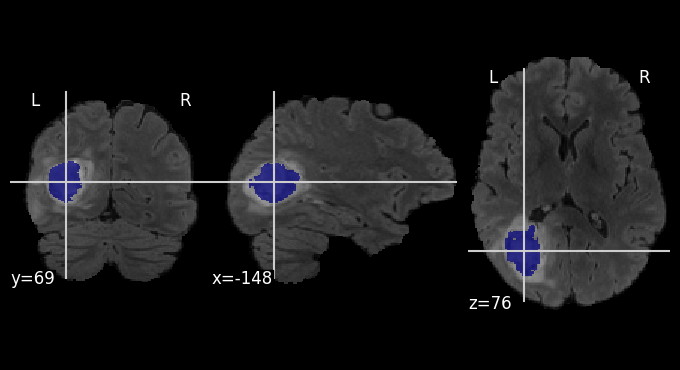

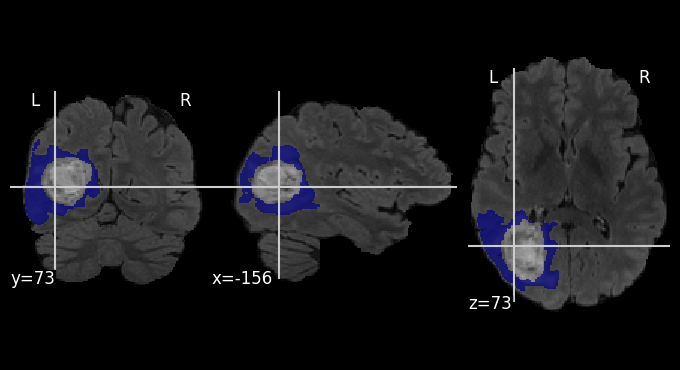

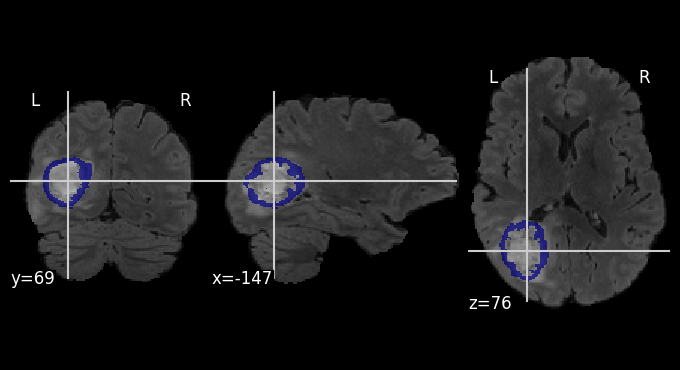

In [19]:
#visualizar paciente 00016
Img_flair=r"C:\\Users\\ORMAN\\Desktop\\cambio de nombre\\BraTS2021_Training_Data\sub-00016\sub-00016_FLAIR.nii.gz" #ruta donde esta la imagen
z=[-17]
#plotting.plot_anat(Img_flair, title="Imagen Flair",dim=0, display_mode='z')
plotting.plot_roi(r"C:\Users\ORMAN\Desktop\cambio de nombre\BraTS2021_Training_Data\sub-00016\seg\segmento_1.nii.gz",bg_img=Img_flair)
plt.show()
plotting.plot_roi(r"C:\Users\ORMAN\Desktop\cambio de nombre\BraTS2021_Training_Data\sub-00016\seg\segmento_2.nii.gz",bg_img=Img_flair)
plt.show()
plotting.plot_roi(r"C:\Users\ORMAN\Desktop\cambio de nombre\BraTS2021_Training_Data\sub-00016\seg\segmento_4.nii.gz",bg_img=Img_flair)
plt.show()

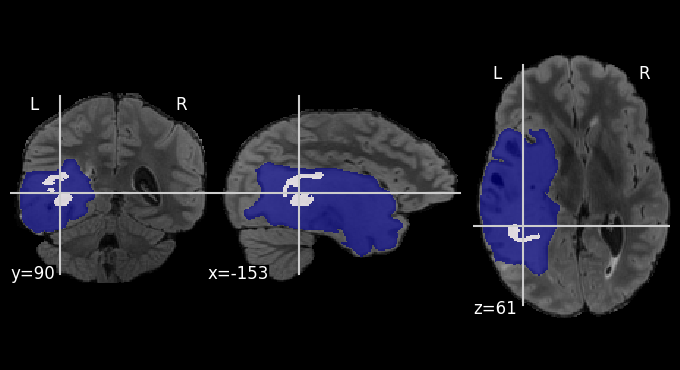

In [21]:
#visualizar paciente 00016
Img_flair=r"C:\\Users\\ORMAN\\Desktop\\cambio de nombre\\BraTS2021_Training_Data\sub-00033\sub-00033_FLAIR.nii.gz" #ruta donde esta la imagen
z=[-17]
#plotting.plot_anat(Img_flair, title="Imagen Flair",dim=0, display_mode='z')
#plotting.plot_roi(r"C:\Users\ORMAN\Desktop\cambio de nombre\BraTS2021_Training_Data\sub-00033\seg\segmento_1.nii.gz",bg_img=Img_flair)
#plt.show()
plotting.plot_roi(r"C:\Users\ORMAN\Desktop\cambio de nombre\BraTS2021_Training_Data\sub-00033\sub-00033_seg.nii.gz",bg_img=Img_flair)
plt.show()
# plotting.plot_roi(r"C:\Users\ORMAN\Desktop\cambio de nombre\BraTS2021_Training_Data\sub-00033\seg\segmento_4.nii.gz",bg_img=Img_flair)
# plt.show()

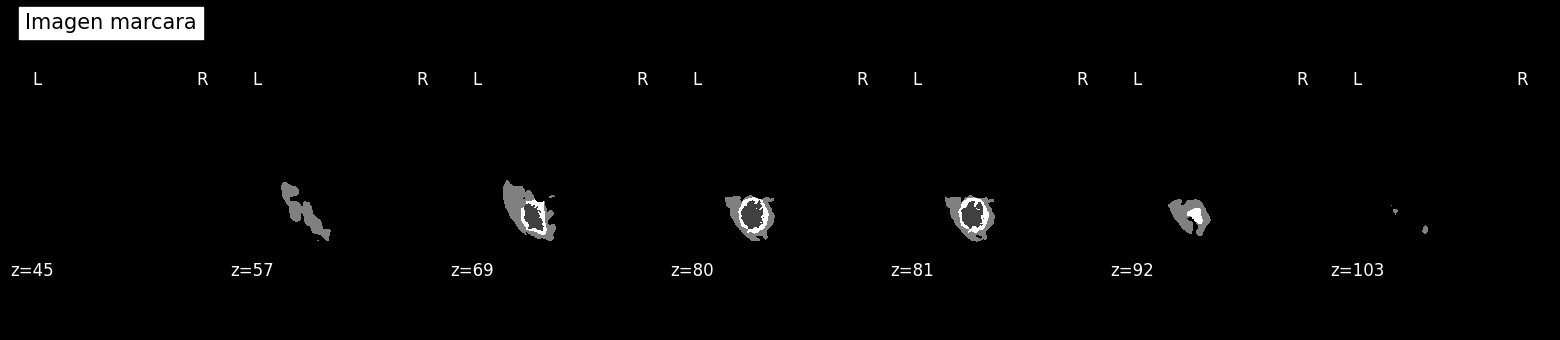

In [12]:
seg=r"C:\\Users\\ORMAN\\Desktop\\cambio de nombre\\BraTS2021_Training_Data\sub-00016\sub-00016_seg.nii.gz" #mascara graficada
z=[-17]
plotting.plot_anat(seg, title="Imagen mascara",dim=0, display_mode='z')
plt.show()

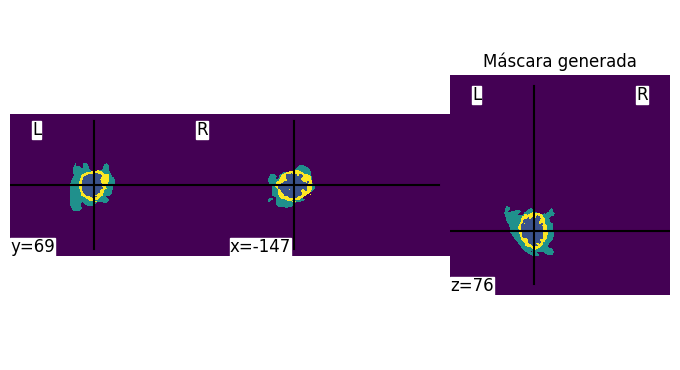

In [13]:
plotting.plot_img(seg, display_mode='ortho')

plt.title('Máscara generada') #mascara graficada
plt.show()

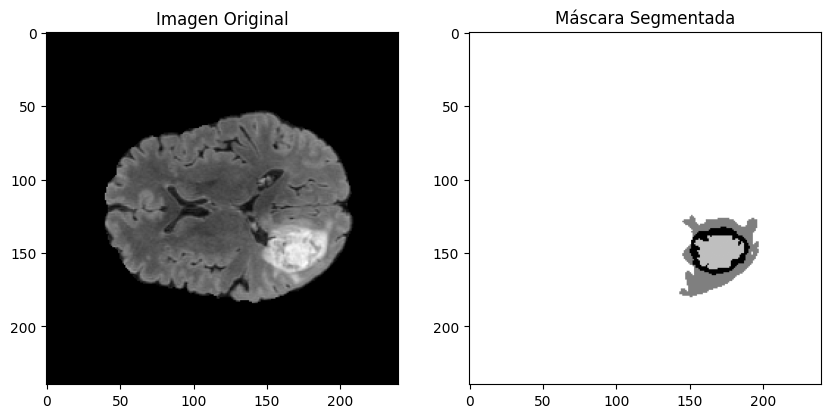

In [14]:
# Visualizar la imagen original
imagenC = nib.load(Img_flair)
segC=nib.load(seg)                 #imagen original y mascara graficada
imagen_data = imagenC.get_fdata()  
mascara=segC.get_fdata()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_data[:, :, imagen_data.shape[2] // 2], cmap='gray')
plt.title('Imagen Original')

# Visualizar la máscara segmentada
plt.subplot(1, 2, 2)
plt.imshow(mascara[:, :, imagen_data.shape[2] // 2], cmap='binary')
plt.title('Máscara Segmentada')

plt.show()